## 1. Header and Imports


The **Imports** section is divided into two parts: general-purpose Python libraries and simulation-specific libraries.


In [1]:
# RCAIDE imports 
import RCAIDE
from RCAIDE.Framework.Core import Units  
from RCAIDE.Library.Methods.Propulsors.Turbofan_Propulsor   import design_turbofan  
from RCAIDE.Library.Methods.Performance.estimate_stall_speed       import estimate_stall_speed 
from RCAIDE.Library.Methods.Geometry.Planform                      import segment_properties   
from RCAIDE.Library.Plots  import *      

# python imports     
import numpy as np  
import sys
import matplotlib.pyplot as plt  
from copy import deepcopy
import pickle
import os 


In [2]:


# ----------------------------------------------------------------------
#   Define the Vehicle
# ----------------------------------------------------------------------
def vehicle_setup(): 
    
    # ------------------------------------------------------------------
    #   Initialize the Vehicle
    # ------------------------------------------------------------------    
    
    vehicle = RCAIDE.Vehicle()
    vehicle.tag = 'Boeing_737-800'

    
    # ################################################# Vehicle-level Properties #################################################   
    vehicle.mass_properties.max_takeoff               = 79015.8 * Units.kilogram  
    vehicle.mass_properties.takeoff                   = 79015.8 * Units.kilogram    
    vehicle.mass_properties.operating_empty           = 62746.4 * Units.kilogram  
    vehicle.mass_properties.max_zero_fuel             = 62732.0 * Units.kilogram 
    vehicle.mass_properties.cargo                     = 10000.  * Units.kilogram  
    vehicle.mass_properties.center_of_gravity         = [[21,0, 0, 0]]
    vehicle.flight_envelope.ultimate_load             = 3.75
    vehicle.flight_envelope.positive_limit_load       = 2.5 
    vehicle.flight_envelope.design_mach_number        = 0.78 
    vehicle.flight_envelope.design_cruise_altitude    = 35000*Units.feet
    vehicle.flight_envelope.design_range              = 3500 * Units.nmi
    vehicle.reference_area                            = 124.862 * Units['meters**2']   
    vehicle.passengers                                = 170
    vehicle.systems.control                           = "fully powered" 
    vehicle.systems.accessories                       = "medium range"

    # ################################################# Landing Gear #############################################################   
    # ------------------------------------------------------------------        
    #  Landing Gear
    # ------------------------------------------------------------------  
    main_gear               = RCAIDE.Library.Components.Landing_Gear.Main_Landing_Gear()
    main_gear.tire_diameter = 1.12000 * Units.m
    main_gear.strut_length  = 1.8 * Units.m 
    main_gear.units         = 2    # Number of main landing gear
    main_gear.wheels        = 2    # Number of wheels on the main landing gear
    vehicle.append_component(main_gear)  

    nose_gear               = RCAIDE.Library.Components.Landing_Gear.Nose_Landing_Gear()       
    nose_gear.tire_diameter = 0.6858 * Units.m
    nose_gear.units         = 1    # Number of nose landing gear
    nose_gear.wheels        = 2    # Number of wheels on the nose landing gear
    nose_gear.strut_length  = 1.3 * Units.m 
    vehicle.append_component(nose_gear)
     

    # ################################################# Wings ##################################################################### 
    # ------------------------------------------------------------------
    #   Main Wing
    # ------------------------------------------------------------------
 
    wing                                  = RCAIDE.Library.Components.Wings.Main_Wing()
    wing.tag                              = 'main_wing' 
    wing.aspect_ratio                     = 10.18
    wing.sweeps.quarter_chord             = 25 * Units.deg
    wing.thickness_to_chord               = 0.1
    wing.taper                            = 0.1 
    wing.spans.projected                  = 34.32 
    wing.chords.root                      = 7.760 * Units.meter
    wing.chords.tip                       = 0.782 * Units.meter
    wing.chords.mean_aerodynamic          = 4.235 * Units.meter 
    wing.areas.reference                  = 124.862
    wing.areas.wetted                     = 225.08 
    wing.twists.root                      = 4.0 * Units.degrees
    wing.twists.tip                       = 0.0 * Units.degrees 
    wing.origin                           = [[13.61,0,-0.5]]
    wing.aerodynamic_center               = [0,0,0] 
    wing.vertical                         = False
    wing.symmetric                        = True
    wing.high_lift                        = True 
    wing.dynamic_pressure_ratio           = 1.0


    # Wing Segments
    root_airfoil                          = RCAIDE.Library.Components.Airfoils.Airfoil()
    ospath                                = os.path.abspath(os.path.join('Notebook'))
    separator                             = os.path.sep
    rel_path                              = os.path.dirname(ospath) + separator + '..' + separator + '..' + separator + 'Regressions' + separator + 'Vehicles' + separator
    root_airfoil.coordinate_file          = rel_path  + 'Airfoils' + separator + 'B737a.txt'
    segment                               = RCAIDE.Library.Components.Wings.Segments.Segment()
    segment.tag                           = 'Root'
    segment.percent_span_location         = 0.0
    segment.twist                         = 4. * Units.deg
    segment.root_chord_percent            = 1.
    segment.thickness_to_chord            = 0.1
    segment.dihedral_outboard             = 2.5 * Units.degrees
    segment.sweeps.quarter_chord          = 28.225 * Units.degrees
    segment.thickness_to_chord            = .1
    segment.append_airfoil(root_airfoil)
    wing.append_segment(segment)

    yehudi_airfoil                        = RCAIDE.Library.Components.Airfoils.Airfoil()
    yehudi_airfoil.coordinate_file        = rel_path+ 'Airfoils' + separator + 'B737b.txt'
    segment                               = RCAIDE.Library.Components.Wings.Segments.Segment()
    segment.tag                           = 'Yehudi'
    segment.percent_span_location         = 0.324
    segment.twist                         = 0.047193 * Units.deg
    segment.root_chord_percent            = 0.5
    segment.thickness_to_chord            = 0.1
    segment.dihedral_outboard             = 5.5 * Units.degrees
    segment.sweeps.quarter_chord          = 25. * Units.degrees
    segment.thickness_to_chord            = .1
    segment.append_airfoil(yehudi_airfoil)
    wing.append_segment(segment)

    mid_airfoil                           = RCAIDE.Library.Components.Airfoils.Airfoil()
    mid_airfoil.coordinate_file           = rel_path + 'Airfoils' + separator + 'B737c.txt'
    segment                               = RCAIDE.Library.Components.Wings.Segments.Segment()
    segment.tag                           = 'Section_2'
    segment.percent_span_location         = 0.963
    segment.twist                         = 0.00258 * Units.deg
    segment.root_chord_percent            = 0.220
    segment.thickness_to_chord            = 0.1
    segment.dihedral_outboard             = 5.5 * Units.degrees
    segment.sweeps.quarter_chord          = 56.75 * Units.degrees
    segment.thickness_to_chord            = .1
    segment.append_airfoil(mid_airfoil)
    wing.append_segment(segment)

    tip_airfoil                           =  RCAIDE.Library.Components.Airfoils.Airfoil()
    tip_airfoil.coordinate_file           = rel_path + 'Airfoils' + separator + 'B737d.txt'
    segment                               = RCAIDE.Library.Components.Wings.Segments.Segment()
    segment.tag                           = 'Tip'
    segment.percent_span_location         = 1.
    segment.twist                         = 0. * Units.degrees
    segment.root_chord_percent            = 0.10077
    segment.thickness_to_chord            = 0.1
    segment.dihedral_outboard             = 0.
    segment.sweeps.quarter_chord          = 0.
    segment.thickness_to_chord            = .1
    segment.append_airfoil(tip_airfoil)
    wing.append_segment(segment)
    
    # Fill out more segment properties automatically
    wing = segment_properties(wing)    

    # control surfaces -------------------------------------------
    slat                          = RCAIDE.Library.Components.Wings.Control_Surfaces.Slat()
    slat.tag                      = 'slat'
    slat.span_fraction_start      = 0.2
    slat.span_fraction_end        = 0.963
    slat.deflection               = 0.0 * Units.degrees
    slat.chord_fraction           = 0.075
    wing.append_control_surface(slat)

    flap                          = RCAIDE.Library.Components.Wings.Control_Surfaces.Flap()
    flap.tag                      = 'flap'
    flap.span_fraction_start      = 0.2
    flap.span_fraction_end        = 0.7
    flap.deflection               = 0.0 * Units.degrees
    flap.configuration_type       = 'double_slotted'
    flap.chord_fraction           = 0.30
    wing.append_control_surface(flap)

    aileron                       = RCAIDE.Library.Components.Wings.Control_Surfaces.Aileron()
    aileron.tag                   = 'aileron'
    aileron.span_fraction_start   = 0.7
    aileron.span_fraction_end     = 0.963
    aileron.deflection            = 0.0 * Units.degrees
    aileron.chord_fraction        = 0.16
    wing.append_control_surface(aileron)

    # add to vehicle
    vehicle.append_component(wing)


    # ------------------------------------------------------------------
    #  Horizontal Stabilizer
    # ------------------------------------------------------------------

    wing     = RCAIDE.Library.Components.Wings.Horizontal_Tail()
    wing.tag = 'horizontal_stabilizer'

    wing.aspect_ratio            = 4.99
    wing.sweeps.quarter_chord    = 28.2250 * Units.deg  
    wing.thickness_to_chord      = 0.08
    wing.taper                   = 0.3333  
    wing.spans.projected         = 14.4 
    wing.chords.root             = 4.2731 
    wing.chords.tip              = 1.4243 
    wing.chords.mean_aerodynamic = 8.0 
    wing.areas.reference         = 41.49
    wing.areas.exposed           = 59.354    # Exposed area of the horizontal tail
    wing.areas.wetted            = 71.81     # Wetted area of the horizontal tail
    wing.twists.root             = 3.0 * Units.degrees
    wing.twists.tip              = 3.0 * Units.degrees 
    wing.origin                  = [[33.02,0,1.466]]
    wing.aerodynamic_center      = [0,0,0] 
    wing.vertical                = False
    wing.symmetric               = True 
    wing.dynamic_pressure_ratio  = 0.9


    # Wing Segments
    segment                        = RCAIDE.Library.Components.Wings.Segments.Segment()
    segment.tag                    = 'root_segment'
    segment.percent_span_location  = 0.0
    segment.twist                  = 0. * Units.deg
    segment.root_chord_percent     = 1.0
    segment.dihedral_outboard      = 8.63 * Units.degrees
    segment.sweeps.quarter_chord   = 28.2250  * Units.degrees 
    segment.thickness_to_chord     = .1
    wing.append_segment(segment)

    segment                        = RCAIDE.Library.Components.Wings.Segments.Segment()
    segment.tag                    = 'tip_segment'
    segment.percent_span_location  = 1.
    segment.twist                  = 0. * Units.deg
    segment.root_chord_percent     = 0.3333               
    segment.dihedral_outboard      = 0 * Units.degrees
    segment.sweeps.quarter_chord   = 0 * Units.degrees  
    segment.thickness_to_chord     = .1
    wing.append_segment(segment)
    
    # Fill out more segment properties automatically
    wing = segment_properties(wing)        

    # control surfaces -------------------------------------------
    elevator                       = RCAIDE.Library.Components.Wings.Control_Surfaces.Elevator()
    elevator.tag                   = 'elevator'
    elevator.span_fraction_start   = 0.09
    elevator.span_fraction_end     = 0.92
    elevator.deflection            = 0.0  * Units.deg
    elevator.chord_fraction        = 0.3
    wing.append_control_surface(elevator)

    # add to vehicle
    vehicle.append_component(wing)


    # ------------------------------------------------------------------
    #   Vertical Stabilizer
    # ------------------------------------------------------------------

    wing = RCAIDE.Library.Components.Wings.Vertical_Tail()
    wing.tag = 'vertical_stabilizer'

    wing.aspect_ratio            = 1.98865
    wing.sweeps.quarter_chord    = 31.2  * Units.deg   
    wing.thickness_to_chord      = 0.08
    wing.taper                   = 0.1183

    wing.spans.projected         = 8.33
    wing.total_length            = wing.spans.projected 
    
    wing.chords.root             = 10.1 
    wing.chords.tip              = 1.20 
    wing.chords.mean_aerodynamic = 4.0

    wing.areas.reference         = 34.89
    wing.areas.wetted            = 57.25 
    
    wing.twists.root             = 0.0 * Units.degrees
    wing.twists.tip              = 0.0 * Units.degrees

    wing.origin                  = [[26.944,0,1.54]]
    wing.aerodynamic_center      = [0,0,0]

    wing.vertical                = True
    wing.symmetric               = False
    wing.t_tail                  = False

    wing.dynamic_pressure_ratio  = 1.0


    # Wing Segments
    segment                               = RCAIDE.Library.Components.Wings.Segments.Segment()
    segment.tag                           = 'root'
    segment.percent_span_location         = 0.0
    segment.twist                         = 0. * Units.deg
    segment.root_chord_percent            = 1.
    segment.dihedral_outboard             = 0 * Units.degrees
    segment.sweeps.quarter_chord          = 61.485 * Units.degrees  
    segment.thickness_to_chord            = .1
    wing.append_segment(segment)

    segment                               = RCAIDE.Library.Components.Wings.Segments.Segment()
    segment.tag                           = 'segment_1'
    segment.percent_span_location         = 0.2962
    segment.twist                         = 0. * Units.deg
    segment.root_chord_percent            = 0.45
    segment.dihedral_outboard             = 0. * Units.degrees
    segment.sweeps.quarter_chord          = 31.2 * Units.degrees   
    segment.thickness_to_chord            = .1
    wing.append_segment(segment)

    segment                               = RCAIDE.Library.Components.Wings.Segments.Segment()
    segment.tag                           = 'segment_2'
    segment.percent_span_location         = 1.0
    segment.twist                         = 0. * Units.deg
    segment.root_chord_percent            = 0.1183 
    segment.dihedral_outboard             = 0.0 * Units.degrees
    segment.sweeps.quarter_chord          = 0.0    
    segment.thickness_to_chord            = .1  
    wing.append_segment(segment)
    
    
    # Fill out more segment properties automatically
    wing = segment_properties(wing)        

    # add to vehicle
    vehicle.append_component(wing)

    # ################################################# Fuselage ################################################################ 
    
    fuselage                                    = RCAIDE.Library.Components.Fuselages.Tube_Fuselage() 
    fuselage.number_coach_seats                 = vehicle.passengers 
    fuselage.seats_abreast                      = 6
    fuselage.seat_pitch                         = 1     * Units.meter 
    fuselage.fineness.nose                      = 1.6
    fuselage.fineness.tail                      = 2. 
    fuselage.lengths.nose                       = 6.4   * Units.meter
    fuselage.lengths.tail                       = 8.0   * Units.meter
    fuselage.lengths.total                      = 38.02 * Units.meter  
    fuselage.lengths.fore_space                 = 6.    * Units.meter
    fuselage.lengths.aft_space                  = 5.    * Units.meter
    fuselage.width                              = 3.74  * Units.meter
    fuselage.heights.maximum                    = 3.74  * Units.meter
    fuselage.effective_diameter                 = 3.74     * Units.meter
    fuselage.areas.side_projected               = 142.1948 * Units['meters**2'] 
    fuselage.areas.wetted                       = 446.718  * Units['meters**2'] 
    fuselage.areas.front_projected              = 12.57    * Units['meters**2']  
    fuselage.differential_pressure              = 5.0e4 * Units.pascal 
    fuselage.heights.at_quarter_length          = 3.74 * Units.meter
    fuselage.heights.at_three_quarters_length   = 3.65 * Units.meter
    fuselage.heights.at_wing_root_quarter_chord = 3.74 * Units.meter

    # Segment  
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment() 
    segment.tag                                 = 'segment_0'    
    segment.percent_x_location                  = 0.0000
    segment.percent_z_location                  = -0.00144
    fuselage.segments.append(segment)   
    
    # Segment  
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment() 
    segment.tag                                 = 'segment_1'    
    segment.percent_x_location                  = 0.00576 
    segment.percent_z_location                  = -0.00144 
    segment.height                              = 0.7500
    segment.width                               = 0.6500
    fuselage.segments.append(segment)   
    
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_2'   
    segment.percent_x_location                  = 0.02017 
    segment.percent_z_location                  = -0.00050
    segment.height                              = 1.59978
    segment.width                               = 1.20043 
    fuselage.segments.append(segment)      
    
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_3'   
    segment.percent_x_location                  = 0.03170 
    segment.percent_z_location                  = 0.00000 
    segment.height                              = 1.96435 
    segment.width                               = 1.52783 
    fuselage.segments.append(segment)   

    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_4'   
    segment.percent_x_location                  = 0.04899 	
    segment.percent_z_location                  = 0.00431 
    segment.height                              = 2.72826 
    segment.width                               = 1.96435 
    fuselage.segments.append(segment)   
    
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_5'   
    segment.percent_x_location                  = 0.07781 
    segment.percent_z_location                  = 0.00861 
    segment.height                              = 3.49217 
    segment.width                               = 2.61913 
    fuselage.segments.append(segment)     
    
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_6'   
    segment.percent_x_location                  = 0.10375 
    segment.percent_z_location                  = 0.01005 
    segment.height                              = 3.70130 
    segment.width                               = 3.05565 
    fuselage.segments.append(segment)             
     
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_7'   
    segment.percent_x_location                  = 0.16427 
    segment.percent_z_location                  = 0.01148 
    segment.height                              = 3.92870 
    segment.width                               = 3.71043 
    fuselage.segments.append(segment)    
    
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Circle_Segment()
    segment.tag                                 = 'segment_8'   
    segment.percent_x_location                  = 0.22478 
    segment.percent_z_location                  = 0.01148 
    segment.height                              = 3.92870 
    segment.width                               = 3.92870 
    fuselage.segments.append(segment)   
    
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Circle_Segment()
    segment.tag                                 = 'segment_9'     
    segment.percent_x_location                  = 0.69164 
    segment.percent_z_location                  = 0.01292
    segment.height                              = 3.81957
    segment.width                               = 3.81957
    fuselage.segments.append(segment)     
        
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Circle_Segment()
    segment.tag                                 = 'segment_10'     
    segment.percent_x_location                  = 0.71758 
    segment.percent_z_location                  = 0.01292
    segment.height                              = 3.81957
    segment.width                               = 3.81957
    fuselage.segments.append(segment)   
        
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_11'     
    segment.percent_x_location                  = 0.78098 
    segment.percent_z_location                  = 0.01722
    segment.height                              = 3.49217
    segment.width                               = 3.71043
    fuselage.segments.append(segment)    
        
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_12'     
    segment.percent_x_location                  = 0.85303
    segment.percent_z_location                  = 0.02296
    segment.height                              = 3.05565
    segment.width                               = 3.16478
    fuselage.segments.append(segment)             
        
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_13'     
    segment.percent_x_location                  = 0.91931 
    segment.percent_z_location                  = 0.03157
    segment.height                              = 2.40087
    segment.width                               = 1.96435
    fuselage.segments.append(segment)               
        
    # Segment                                   
    segment                                     = RCAIDE.Library.Components.Fuselages.Segments.Segment()
    segment.tag                                 = 'segment_14'     
    segment.percent_x_location                  = 1.00 
    segment.percent_z_location                  = 0.04593
    segment.height                              = 1.09130
    segment.width                               = 0.21826
    fuselage.segments.append(segment)       
    
    # add to vehicle
    vehicle.append_component(fuselage)
     

    # ################################################# Energy Network #######################################################          
    #------------------------------------------------------------------------------------------------------------------------- 
    #  Turbofan Network
    #-------------------------------------------------------------------------------------------------------------------------   
    net                                         = RCAIDE.Framework.Networks.Fuel() 
    
    #------------------------------------------------------------------------------------------------------------------------- 
    # Fuel Distrubition Line 
    #------------------------------------------------------------------------------------------------------------------------- 
    fuel_line                                   = RCAIDE.Library.Components.Energy.Distributors.Fuel_Line()  
    
    #------------------------------------------------------------------------------------------------------------------------------------  
    # Propulsor: Starboard Propulsor
    #------------------------------------------------------------------------------------------------------------------------------------         
    turbofan                                    = RCAIDE.Library.Components.Propulsors.Turbofan() 
    turbofan.tag                                = 'starboard_propulsor'
    turbofan.active_fuel_tanks                  = ['fuel_tank']   
    turbofan.origin                             = [[13.72, 4.86,-1.1]] 
    turbofan.engine_length                      = 2.71     
    turbofan.bypass_ratio                       = 5.4    
    turbofan.design_altitude                    = 35000.0*Units.ft
    turbofan.design_mach_number                 = 0.78   
    turbofan.design_thrust                      = 35000.0* Units.N 
             
    # fan                
    fan                                         = RCAIDE.Library.Components.Propulsors.Converters.Fan()   
    fan.tag                                     = 'fan'
    fan.polytropic_efficiency                   = 0.93
    fan.pressure_ratio                          = 1.7   
    turbofan.fan                                = fan        
                   
    # working fluid                   
    turbofan.working_fluid                      = RCAIDE.Library.Attributes.Gases.Air() 
    ram                                         = RCAIDE.Library.Components.Propulsors.Converters.Ram()
    ram.tag                                     = 'ram' 
    turbofan.ram                                = ram 
          
    # inlet nozzle          
    inlet_nozzle                                = RCAIDE.Library.Components.Propulsors.Converters.Compression_Nozzle()
    inlet_nozzle.tag                            = 'inlet nozzle'
    inlet_nozzle.polytropic_efficiency          = 0.98
    inlet_nozzle.pressure_ratio                 = 0.98 
    turbofan.inlet_nozzle                       = inlet_nozzle 

    # low pressure compressor    
    low_pressure_compressor                       = RCAIDE.Library.Components.Propulsors.Converters.Compressor()    
    low_pressure_compressor.tag                   = 'lpc'
    low_pressure_compressor.polytropic_efficiency = 0.91
    low_pressure_compressor.pressure_ratio        = 1.9   
    turbofan.low_pressure_compressor              = low_pressure_compressor

    # high pressure compressor  
    high_pressure_compressor                       = RCAIDE.Library.Components.Propulsors.Converters.Compressor()    
    high_pressure_compressor.tag                   = 'hpc'
    high_pressure_compressor.polytropic_efficiency = 0.91
    high_pressure_compressor.pressure_ratio        = 10.0    
    turbofan.high_pressure_compressor              = high_pressure_compressor

    # low pressure turbine  
    low_pressure_turbine                           = RCAIDE.Library.Components.Propulsors.Converters.Turbine()   
    low_pressure_turbine.tag                       ='lpt'
    low_pressure_turbine.mechanical_efficiency     = 0.99
    low_pressure_turbine.polytropic_efficiency     = 0.93 
    turbofan.low_pressure_turbine                  = low_pressure_turbine
   
    # high pressure turbine     
    high_pressure_turbine                          = RCAIDE.Library.Components.Propulsors.Converters.Turbine()   
    high_pressure_turbine.tag                      ='hpt'
    high_pressure_turbine.mechanical_efficiency    = 0.99
    high_pressure_turbine.polytropic_efficiency    = 0.93 
    turbofan.high_pressure_turbine                 = high_pressure_turbine 

    # combustor  
    combustor                                      = RCAIDE.Library.Components.Propulsors.Converters.Combustor()   
    combustor.tag                                  = 'Comb'
    combustor.efficiency                           = 0.99 
    combustor.alphac                               = 1.0     
    combustor.turbine_inlet_temperature            = 1500
    combustor.pressure_ratio                       = 0.95
    combustor.fuel_data                            = RCAIDE.Library.Attributes.Propellants.Jet_A1()  
    turbofan.combustor                             = combustor

    # core nozzle
    core_nozzle                                    = RCAIDE.Library.Components.Propulsors.Converters.Expansion_Nozzle()   
    core_nozzle.tag                                = 'core nozzle'
    core_nozzle.polytropic_efficiency              = 0.95
    core_nozzle.pressure_ratio                     = 0.99  
    turbofan.core_nozzle                           = core_nozzle
             
    # fan nozzle             
    fan_nozzle                                     = RCAIDE.Library.Components.Propulsors.Converters.Expansion_Nozzle()   
    fan_nozzle.tag                                 = 'fan nozzle'
    fan_nozzle.polytropic_efficiency               = 0.95
    fan_nozzle.pressure_ratio                      = 0.99 
    turbofan.fan_nozzle                            = fan_nozzle 
    
    # design turbofan
    design_turbofan(turbofan)  
    # append propulsor to distribution line  
   
 
    # Nacelle 
    nacelle                                     = RCAIDE.Library.Components.Nacelles.Body_of_Revolution_Nacelle()
    nacelle.diameter                            = 2.05
    nacelle.length                              = 2.71
    nacelle.tag                                 = 'nacelle_1'
    nacelle.inlet_diameter                      = 2.0
    nacelle.origin                              = [[13.5,4.38,-1.5]] 
    nacelle.areas.wetted                        = 1.1*np.pi*nacelle.diameter*nacelle.length 
    nacelle_airfoil                             = RCAIDE.Library.Components.Airfoils.NACA_4_Series_Airfoil()
    nacelle_airfoil.NACA_4_Series_code          = '2410'
    nacelle.append_airfoil(nacelle_airfoil)  
    turbofan.nacelle                            = nacelle

    # append propulsor to network    
    net.propulsors.append(turbofan)  

    #------------------------------------------------------------------------------------------------------------------------------------  
    # Propulsor: Port Propulsor
    #------------------------------------------------------------------------------------------------------------------------------------      
    # copy turbofan
    turbofan_2                                  = deepcopy(turbofan)
    turbofan_2.active_fuel_tanks                = ['fuel_tank'] 
    turbofan_2.tag                              = 'port_propulsor' 
    turbofan_2.origin                           = [[13.72,-4.38,-1.1]]  # change origin 
    turbofan_2.nacelle.origin                   = [[13.5,-4.38,-1.5]]
         
    # append propulsor to network
    net.propulsors.append(turbofan_2)
  
    #------------------------------------------------------------------------------------------------------------------------- 
    #  Energy Source: Fuel Tank
    #------------------------------------------------------------------------------------------------------------------------- 
    # fuel tank
    fuel_tank                                        = RCAIDE.Library.Components.Energy.Sources.Fuel_Tanks.Fuel_Tank()
    fuel_tank.origin                                 = vehicle.wings.main_wing.origin  
    fuel_tank.fuel                                   = RCAIDE.Library.Attributes.Propellants.Jet_A1()   
    fuel_tank.fuel.mass_properties.mass              = vehicle.mass_properties.max_takeoff-vehicle.mass_properties.max_fuel
    fuel_tank.fuel.origin                            = vehicle.wings.main_wing.mass_properties.center_of_gravity      
    fuel_tank.fuel.mass_properties.center_of_gravity = vehicle.wings.main_wing.aerodynamic_center
    fuel_tank.volume                                 = fuel_tank.fuel.mass_properties.mass/fuel_tank.fuel.density   
    fuel_line.fuel_tanks.append(fuel_tank)
    
    #------------------------------------------------------------------------------------------------------------------------------------   
    # Assign propulsors to fuel line to network      
    fuel_line.assigned_propulsors =  [[turbofan.tag, turbofan_2.tag]]

    #------------------------------------------------------------------------------------------------------------------------------------   
    # Append fuel line to fuel line to network      
    net.fuel_lines.append(fuel_line)        
    
    # Append energy network to aircraft 
    vehicle.append_energy_network(net)       
    #------------------------------------------------------------------------------------------------------------------------- 
    # Done ! 
    #------------------------------------------------------------------------------------------------------------------------- 
      
    return vehicle
 


# ----------------------------------------------------------------------
#   Define the Configurations
# ---------------------------------------------------------------------

def configs_setup(vehicle):

    # ------------------------------------------------------------------
    #   Initialize Configurations
    # ------------------------------------------------------------------

    configs         = RCAIDE.Library.Components.Configs.Config.Container() 
    base_config     = RCAIDE.Library.Components.Configs.Config(vehicle)
    base_config.tag = 'base'  
    configs.append(base_config)    
    return configs

# ----------------------------------------------------------------------
#   Plot Mission
# ----------------------------------------------------------------------
def plot_mission(results):

    
    # Plot Flight Conditions 
    plot_flight_conditions(results)
    
    # Plot Aerodynamic Forces 
    plot_aerodynamic_forces(results)
    
    # Plot Aerodynamic Coefficients 
    plot_aerodynamic_coefficients(results)
    
    # Drag Components
    plot_drag_components(results)
    
    # Plot Altitude, sfc, vehicle weight 
    plot_altitude_sfc_weight(results)
    
    # Plot Velocities 
    plot_aircraft_velocities(results)  
    
    # Plot Trajectory
    plot_flight_trajectory(results)
    
    # Plot throttles
    plot_propulsor_throttles(results) 

    return 
 

# ----------------------------------------------------------------------
#   Define the Mission
# ----------------------------------------------------------------------
# ----------------------------------------------------------------------
#   Define the Mission
# ----------------------------------------------------------------------

def mission_setup(analyses):
    

    # ------------------------------------------------------------------
    #   Initialize the Mission
    # ------------------------------------------------------------------
    mission = RCAIDE.Framework.Mission.Sequential_Segments()
    mission.tag = 'mission' 

    # unpack Segments module
    Segments = RCAIDE.Framework.Mission.Segments  
    base_segment = Segments.Segment()
  

    # VSTALL Calculation  
    vehicle        = analyses.base.aerodynamics.vehicle
    vehicle_mass   = vehicle.mass_properties.max_takeoff
    reference_area = vehicle.reference_area 
    Vstall         = estimate_stall_speed(vehicle_mass,reference_area,altitude = 0.0,maximum_lift_coefficient = 1.2)
      
    # ------------------------------------------------------------------
    #   Takeoff
    # ------------------------------------------------------------------      
    segment = Segments.Ground.Takeoff(base_segment)
    segment.tag = "Takeoff"  
    segment.analyses.extend( analyses.base) 
    segment.velocity_start                                   = Vstall*0.1 
    segment.velocity_end                                     = Vstall*1.2  
    segment.friction_coefficient                             = 0.04   
    segment.throttle                                         = 0.8    
    mission.append_segment(segment) 
  
    
    # ------------------------------------------------------------------
    #   Departure End of Runway Segment Flight 1 : 
    # ------------------------------------------------------------------ 
    segment = Segments.Climb.Linear_Speed_Constant_Rate(base_segment) 
    segment.tag = 'Departure_End_of_Runway'       
    segment.analyses.extend( analyses.base )  
    segment.altitude_start                                = 0.0 * Units.feet
    segment.altitude_end                                  = 50.0 * Units.feet
    segment.air_speed_start                               = Vstall *1.2  
    segment.air_speed_end                                 = Vstall *1.25  
            
    # define flight dynamics to model 
    segment.flight_dynamics.force_x                       = True  
    segment.flight_dynamics.force_z                       = True     
    
    # define flight controls 
    segment.assigned_control_variables.throttle.active               = True           
    segment.assigned_control_variables.throttle.assigned_propulsors  = [['starboard_propulsor','port_propulsor']]
    segment.assigned_control_variables.body_angle.active             = True                   
       
    mission.append_segment(segment)
    
    # ------------------------------------------------------------------
    #   Initial Climb Area Segment Flight 1  
    # ------------------------------------------------------------------ 
    segment = Segments.Climb.Linear_Speed_Constant_Rate(base_segment) 
    segment.tag = 'Initial_CLimb_Area' 
    segment.analyses.extend( analyses.base )   
    segment.altitude_start                                = 50.0 * Units.feet
    segment.altitude_end                                  = 500.0 * Units.feet 
    segment.air_speed_end                                 = Vstall *1.3 
    segment.climb_rate                                    = 600 * Units['ft/min']   
    
    # define flight dynamics to model 
    segment.flight_dynamics.force_x                       = True  
    segment.flight_dynamics.force_z                       = True     
    
    # define flight controls  
    segment.assigned_control_variables.throttle.active               = True           
    segment.assigned_control_variables.throttle.assigned_propulsors  = [['starboard_propulsor','port_propulsor']]
    segment.assigned_control_variables.body_angle.active             = True                
          
    mission.append_segment(segment)  
   
             
    # ------------------------------------------------------------------
    #   Climb Segment Flight 1 
    # ------------------------------------------------------------------ 
    segment = Segments.Climb.Linear_Speed_Constant_Rate(base_segment) 
    segment.tag = 'Climb_1'        
    segment.analyses.extend( analyses.base)      
    segment.altitude_start                                = 500.0 * Units.feet
    segment.altitude_end                                  = 2500 * Units.feet  
    segment.air_speed_end                                 = 120 * Units.kts 
    segment.climb_rate                                    = 500* Units['ft/min']  
    
    # define flight dynamics to model 
    segment.flight_dynamics.force_x                       = True  
    segment.flight_dynamics.force_z                       = True     
    
    # define flight controls  
    segment.assigned_control_variables.throttle.active               = True           
    segment.assigned_control_variables.throttle.assigned_propulsors  = [['starboard_propulsor','port_propulsor']]
    segment.assigned_control_variables.body_angle.active             = True
    
    mission.append_segment(segment)
    
        
    # ------------------------------------------------------------------
    #   Climb 1 : constant Speed, constant rate segment 
    # ------------------------------------------------------------------ 
    segment = Segments.Climb.Linear_Speed_Constant_Rate(base_segment)
    segment.tag = "Climb_2"
    segment.analyses.extend( analyses.base)
    segment.altitude_start                                = 2500.0  * Units.feet
    segment.altitude_end                                  = 25000   * Units.feet  
    segment.air_speed_end                                 = 130 * Units.kts 
    segment.climb_rate                                    = 700.034 * Units['ft/min']   
    
    # define flight dynamics to model 
    segment.flight_dynamics.force_x                       = True  
    segment.flight_dynamics.force_z                       = True     
    
    # define flight controls  
    segment.assigned_control_variables.throttle.active               = True           
    segment.assigned_control_variables.throttle.assigned_propulsors  = [['starboard_propulsor','port_propulsor']]
    segment.assigned_control_variables.body_angle.active             = True       
    mission.append_segment(segment)

    # ------------------------------------------------------------------
    #   Cruise Segment: constant Speed, constant altitude
    # ------------------------------------------------------------------ 
    segment = Segments.Cruise.Constant_Speed_Constant_Altitude(base_segment)
    segment.tag = "Cruise" 
    segment.analyses.extend(analyses.base) 
    segment.altitude                                      = 25000   * Units.feet 
    segment.air_speed                                     = 130 * Units.kts
    segment.distance                                      = 200.   * Units.nautical_mile  
    
    # define flight dynamics to model 
    segment.flight_dynamics.force_x                       = True  
    segment.flight_dynamics.force_z                       = True     
    
    # define flight controls  
    segment.assigned_control_variables.throttle.active               = True           
    segment.assigned_control_variables.throttle.assigned_propulsors  = [['starboard_propulsor','port_propulsor']]
    segment.assigned_control_variables.body_angle.active             = True                       
          
    mission.append_segment(segment)    


    # ------------------------------------------------------------------
    #   Descent Segment Flight 1   
    # ------------------------------------------------------------------ 
    segment = Segments.Climb.Linear_Speed_Constant_Rate(base_segment) 
    segment.tag = "Decent"  
    segment.analyses.extend( analyses.base)       
    segment.altitude_start                                = 25000   * Units.feet 
    segment.altitude_end                                  = 1000 * Units.feet  
    segment.air_speed_end                                 = 100 * Units['mph']   
    segment.climb_rate                                    = -200 * Units['ft/min']  
    
    # define flight dynamics to model 
    segment.flight_dynamics.force_x                       = True  
    segment.flight_dynamics.force_z                       = True     
    
    # define flight controls  
    segment.assigned_control_variables.throttle.active               = True           
    segment.assigned_control_variables.throttle.assigned_propulsors  = [['starboard_propulsor','port_propulsor']]
    segment.assigned_control_variables.body_angle.active             = True                      
          
    mission.append_segment(segment)   
               
    # ------------------------------------------------------------------
    #  Downleg_Altitude Segment Flight 1 
    # ------------------------------------------------------------------

    segment = Segments.Cruise.Constant_Speed_Constant_Altitude(base_segment)
    segment.tag = 'Downleg'
    segment.analyses.extend(analyses.base)  
    segment.air_speed                                     = 100 * Units['mph']   
    segment.distance                                      = 6000 * Units.feet
    
    # define flight dynamics to model 
    segment.flight_dynamics.force_x                       = True  
    segment.flight_dynamics.force_z                       = True     
    
    # define flight controls  
    segment.assigned_control_variables.throttle.active               = True           
    segment.assigned_control_variables.throttle.assigned_propulsors  = [['starboard_propulsor','port_propulsor']]
    segment.assigned_control_variables.body_angle.active             = True                        
            
    mission.append_segment(segment)     
     
    # ------------------------------------------------------------------
    #  Baseleg Segment Flight 1  
    # ------------------------------------------------------------------ 
    segment = Segments.Climb.Linear_Speed_Constant_Rate(base_segment)
    segment.tag = 'Baseleg'
    segment.analyses.extend( analyses.base)   
    segment.altitude_start                                = 1000 * Units.feet
    segment.altitude_end                                  = 500.0 * Units.feet
    segment.air_speed_end                                 = 90 * Units['mph']  
    segment.climb_rate                                    = -350 * Units['ft/min'] 
    
    # define flight dynamics to model 
    segment.flight_dynamics.force_x                       = True  
    segment.flight_dynamics.force_z                       = True     
    
    # define flight controls  
    segment.assigned_control_variables.throttle.active               = True           
    segment.assigned_control_variables.throttle.assigned_propulsors  = [['starboard_propulsor','port_propulsor']]
    segment.assigned_control_variables.body_angle.active             = True
    

    # ------------------------------------------------------------------
    #  Final Approach Segment Flight 1  
    # ------------------------------------------------------------------ 
    segment = Segments.Climb.Linear_Speed_Constant_Rate(base_segment)
    segment_name = 'Final_Approach'
    segment.tag = segment_name          
    segment.analyses.extend( analyses.base)      
    segment.altitude_start                                = 500.0 * Units.feet
    segment.altitude_end                                  = 00.0 * Units.feet
    segment.air_speed_end                                 = 80 * Units['mph']  
    segment.climb_rate                                    = -300 * Units['ft/min']   
    
    # define flight dynamics to model 
    segment.flight_dynamics.force_x                       = True  
    segment.flight_dynamics.force_z                       = True     
    
    # define flight controls  
    segment.assigned_control_variables.throttle.active               = True           
    segment.assigned_control_variables.throttle.assigned_propulsors  = [['starboard_propulsor','port_propulsor']]
    segment.assigned_control_variables.body_angle.active             = True
    
    mission.append_segment(segment)  


    # ------------------------------------------------------------------
    #   Landing  
    # ------------------------------------------------------------------  
    segment = Segments.Ground.Landing(base_segment)
    segment.tag = "Landing"   
    segment.analyses.extend( analyses.base)  
    segment.velocity_end                                                  = Vstall*0.1  
    segment.friction_coefficient                                          = 0.4
    segment.altitude                                                      = 0.0 
    segment.assigned_control_variables.elapsed_time.active                = True   
    segment.assigned_control_variables.elapsed_time.initial_guess_values  = [[30.]]   
    
    mission.append_segment(segment)
      

    return mission


def base_analysis(vehicle):

    # ------------------------------------------------------------------
    #   Initialize the Analyses
    # ------------------------------------------------------------------     
    analyses = RCAIDE.Framework.Analyses.Vehicle() 

    # ------------------------------------------------------------------
    #  Weights
    weights = RCAIDE.Framework.Analyses.Weights.Weights_Transport()
    weights.vehicle = vehicle
    analyses.append(weights)

    # ------------------------------------------------------------------
    #  Aerodynamics Analysis
    aerodynamics = RCAIDE.Framework.Analyses.Aerodynamics.Vortex_Lattice_Method() 
    aerodynamics.vehicle                            = vehicle
    aerodynamics.settings.drag_coefficient_increment = 0.0000
    analyses.append(aerodynamics) 

    # ------------------------------------------------------------------
    #  Energy
    energy= RCAIDE.Framework.Analyses.Energy.Energy()
    energy.vehicle = vehicle 
    analyses.append(energy)

    # ------------------------------------------------------------------
    #  Planet Analysis
    planet = RCAIDE.Framework.Analyses.Planets.Earth()
    analyses.append(planet)

    # ------------------------------------------------------------------
    #  Atmosphere Analysis
    atmosphere = RCAIDE.Framework.Analyses.Atmospheric.US_Standard_1976()
    atmosphere.features.planet = planet.features
    analyses.append(atmosphere)   

    # done!
    return analyses 


def analyses_setup(configs):

    analyses = RCAIDE.Framework.Analyses.Analysis.Container()

    # build a base analysis for each config
    for tag,config in configs.items():
        analysis = base_analysis(config)
        analyses[tag] = analysis

    return analyses

def missions_setup(mission): 
 
    missions         = RCAIDE.Framework.Mission.Missions()
    
    # base mission 
    mission.tag  = 'base_mission'
    missions.append(mission)
 
    return missions  


def save_results(results):
 
    # Store data (serialize)
    with open('ATR_72_results.pkl', 'wb') as file:
        pickle.dump(results, file)
        
    return
 

 


Segment did not converge. Segment Tag: Climb_2
Error Message:
The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
Segment did not converge. Segment Tag: Cruise
Error Message:
The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.


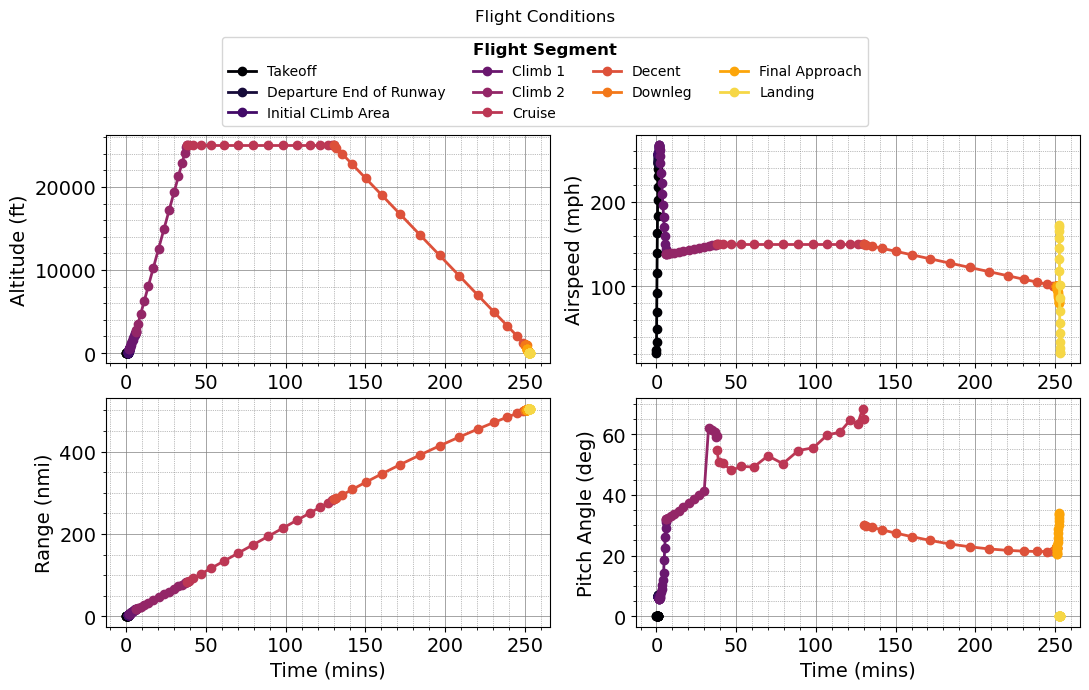

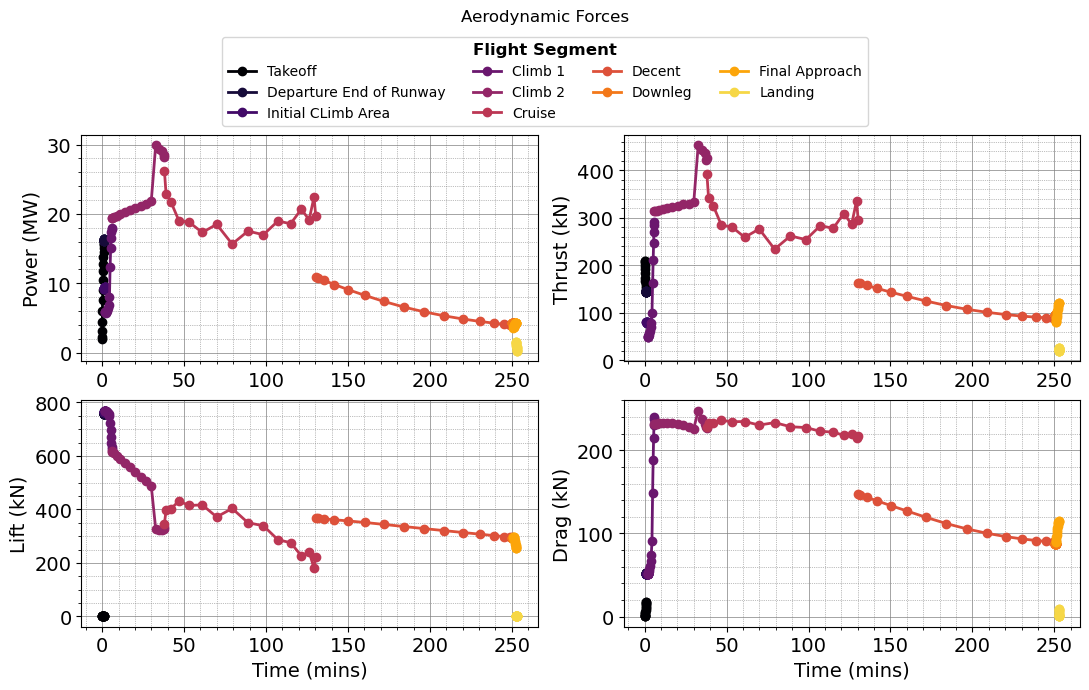

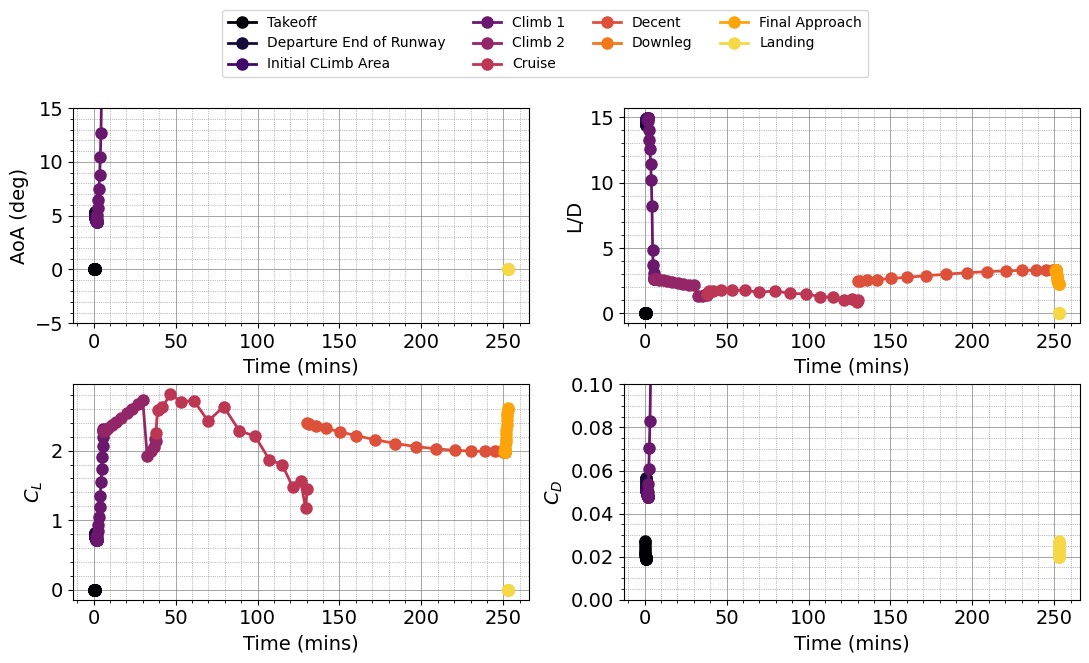

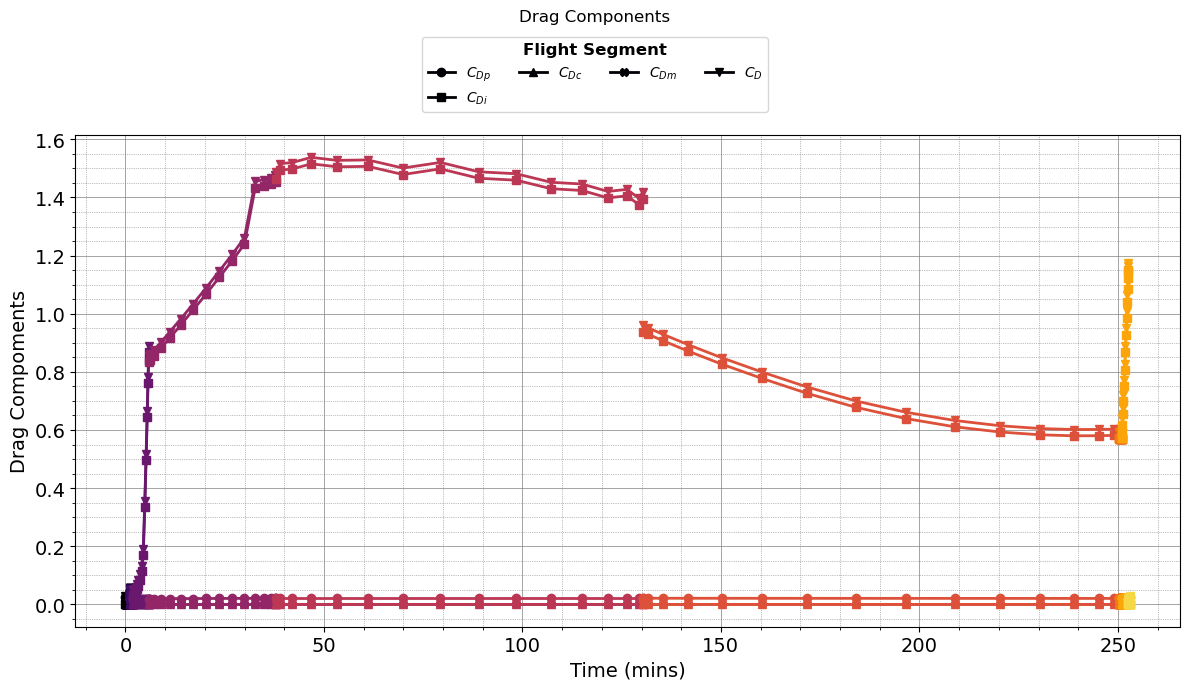

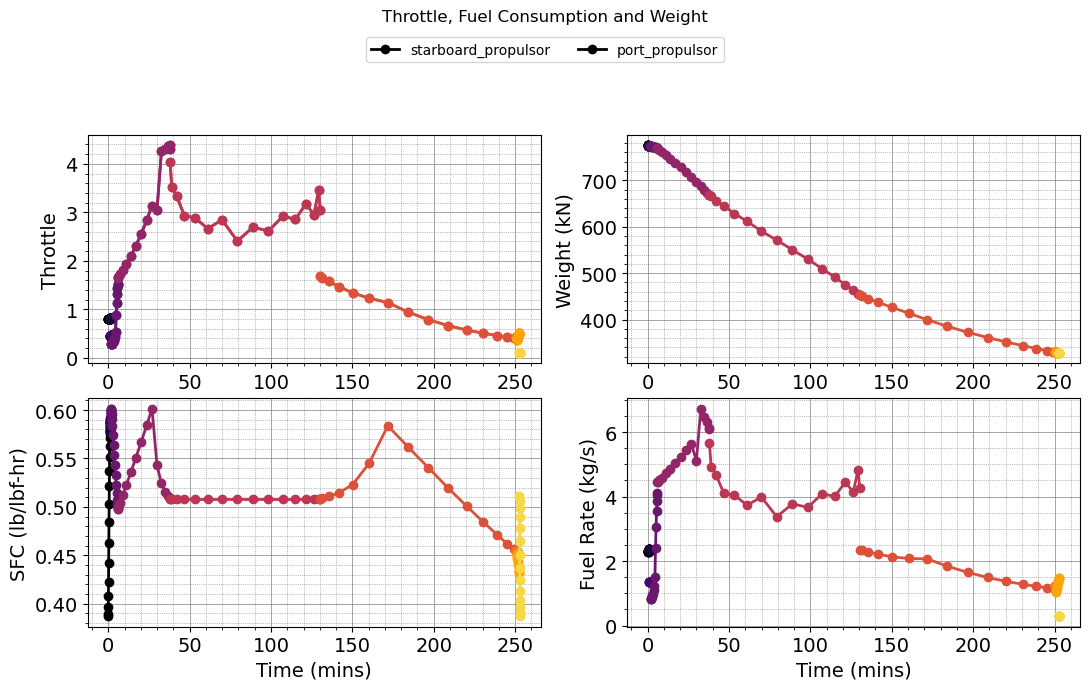

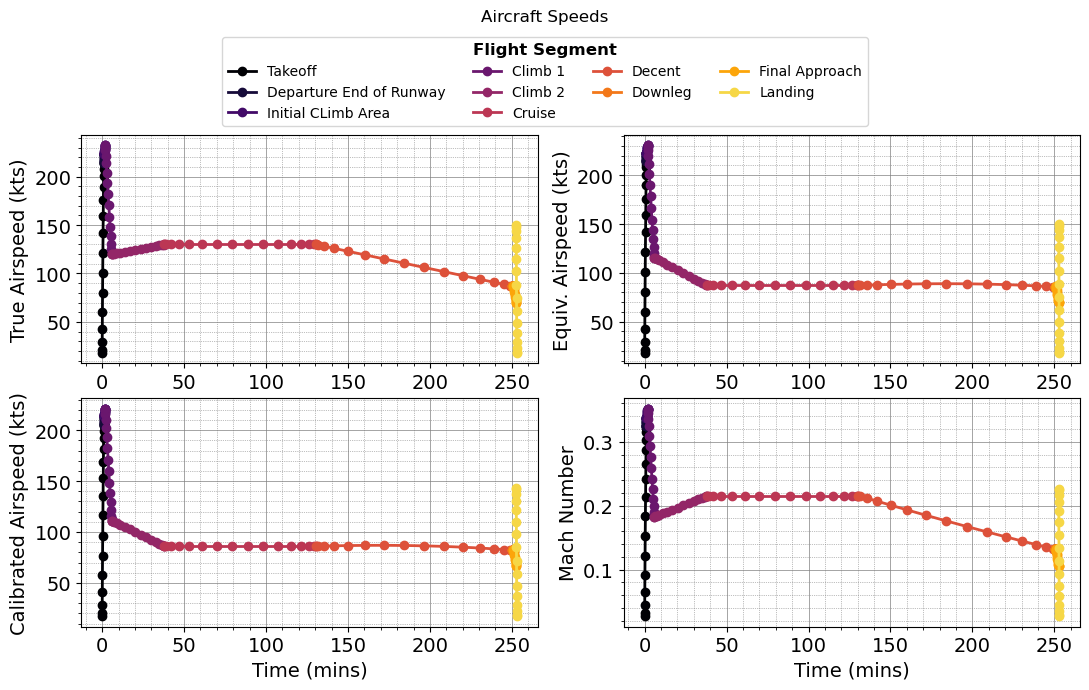

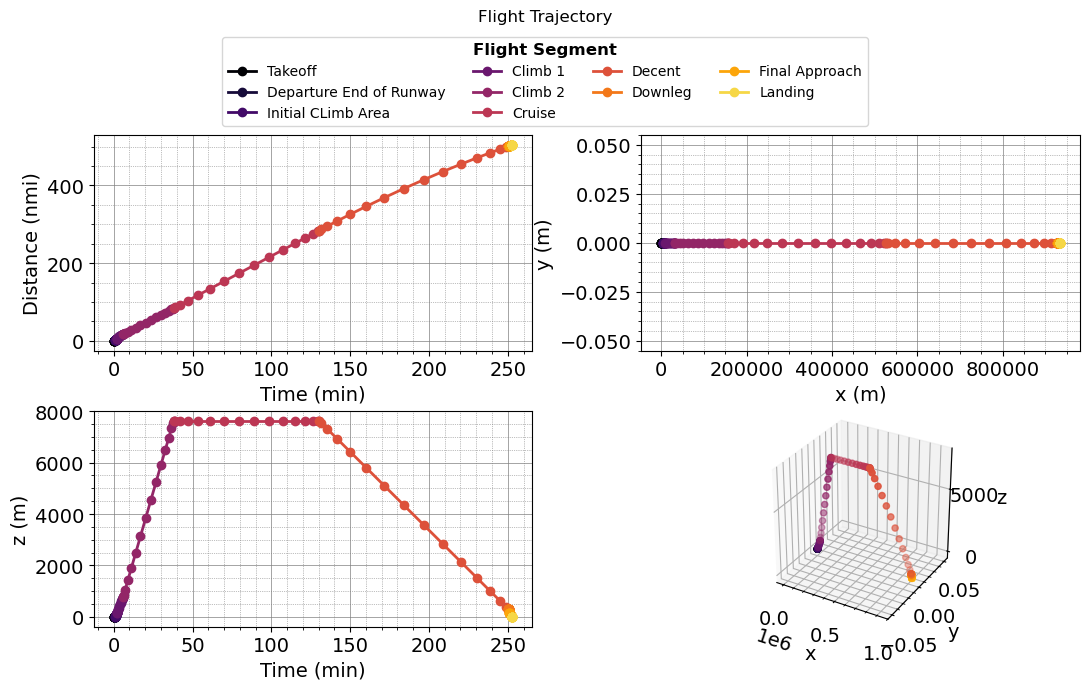

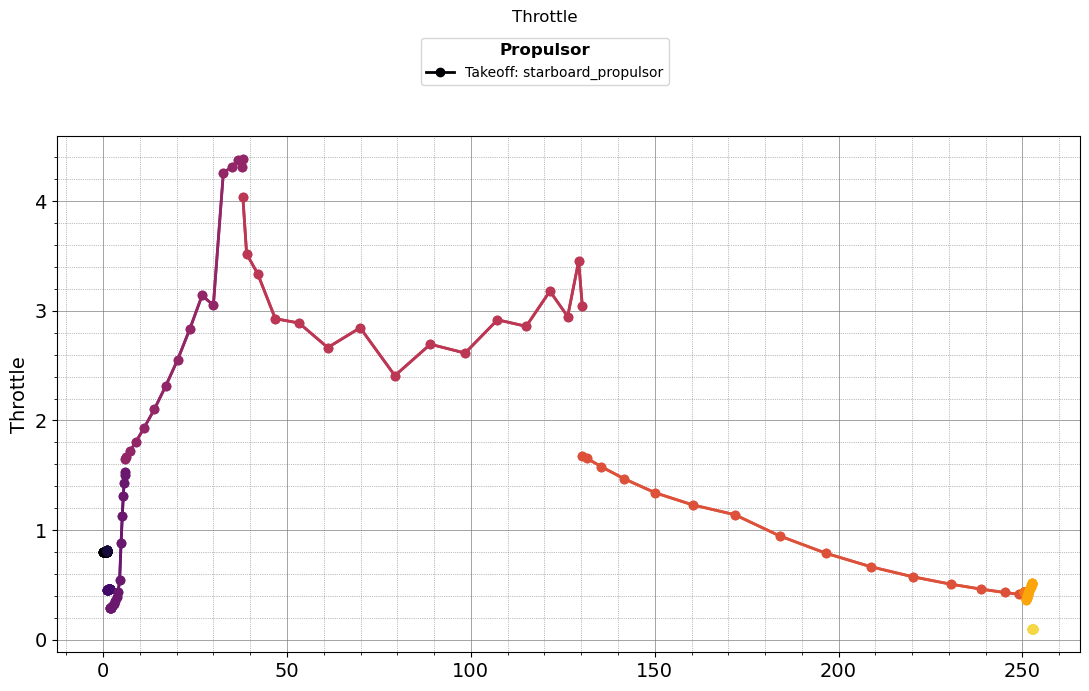

In [3]:

vehicle    = vehicle_setup()  

configs    = configs_setup(vehicle)
    
# create analyses
analyses = analyses_setup(configs)

# mission analyses
mission  = mission_setup(analyses) 

# create mission instances (for multiple types of missions)
missions = missions_setup(mission) 

# mission analysis 
results = missions.base_mission.evaluate()   

# plot the results 
plot_mission(results)  